<a href="https://colab.research.google.com/github/osamasherif22/Image-Segmentation/blob/master/PR_Ass_2_Image_Segmentation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# clone the git hub 
# to add the dataset in the 
#VR files
!git clone https://github.com/osamasherif22/Image-Segmentation



Cloning into 'Image-Segmentation'...
remote: Enumerating objects: 1132, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 1132 (delta 0), reused 0 (delta 0), pack-reused 1128
Receiving objects: 100% (1132/1132), 57.87 MiB | 27.00 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [108]:
root = '/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/'
PATH = os.path.join(root,'data//groundTruth')


os.makedirs(save_pth,exist_ok=True)

for sub_dir_name in ['train','test','val']:
    sub_pth = os.path.join(PATH,sub_dir_name)
    ##Create a new folder for the generated pictures to save
    save_pth = os.path.join(root,'data//GT_sorted',sub_dir_name)
    os.makedirs(save_pth,exist_ok=True)
    sub_pth =  sorted(sub_pth)
    print(sorted_files)
  # imageio.imwrite(os.path.join(save_pth,new_img_name), edge_data_255)  # save Picture

PATH = os.path.join(root,'data//images')

for sub_dir_name in ['train','test','val']:
    sub_pth = os.path.join(PATH,sub_dir_name)
    ##Create a new folder for the generated pictures to save
    save_pth = os.path.join(base,'data//GT_sorted',sub_dir_name)
    os.makedirs(save_pth,exist_ok=True)
    sub_pth =  sorted(sub_pth)
    print(sorted_files)

['100075.jpg', '100080.jpg', '100098.jpg', '103041.jpg', '104022.jpg', '105019.jpg', '105053.jpg', '106020.jpg', '106025.jpg', '108041.jpg', '108073.jpg', '109034.jpg', '112082.jpg', '113009.jpg', '113016.jpg', '113044.jpg', '117054.jpg', '118020.jpg', '118035.jpg', '12003.jpg', '12074.jpg', '122048.jpg', '124084.jpg', '126039.jpg', '130034.jpg', '134008.jpg', '134052.jpg', '135037.jpg', '135069.jpg', '138032.jpg', '138078.jpg', '140055.jpg', '140075.jpg', '144067.jpg', '145014.jpg', '145053.jpg', '147021.jpg', '147062.jpg', '15004.jpg', '15088.jpg', '151087.jpg', '153077.jpg', '153093.jpg', '155060.jpg', '156079.jpg', '157036.jpg', '159029.jpg', '159045.jpg', '159091.jpg', '16052.jpg', '161062.jpg', '163014.jpg', '163062.jpg', '164074.jpg', '166081.jpg', '169012.jpg', '170054.jpg', '172032.jpg', '173036.jpg', '176019.jpg', '176035.jpg', '176039.jpg', '178054.jpg', '181018.jpg', '181079.jpg', '181091.jpg', '183055.jpg', '183087.jpg', '187003.jpg', '187029.jpg', '187039.jpg', '187071.jp

**Load the data set and Display an image**

In [109]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image
from google.colab.patches import cv2_imshow


# Read all the jpg image directory
def load_image(image_path, arr_imgs):
    file_name=glob(image_path+"/*jpg")
    for file in file_name:
        pic = cv2.imread(file).astype(np.float32)
        arr_imgs.append(pic)
    arr_imgs = np.array(arr_imgs)
    display_img(arr_imgs)
    return arr_imgs

def display_img (arr_imgs):
  # Output img with window name as 'image'
  cv2_imshow(arr_imgs[0])  
  # Maintain output window utill
  # user presses a key
  cv2.waitKey(0)      



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


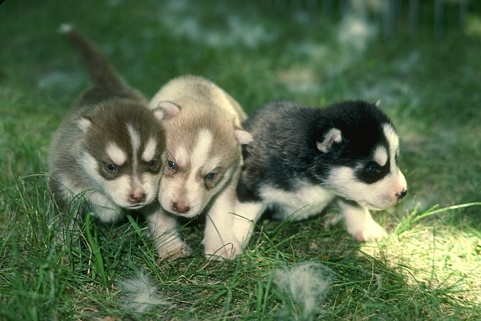

(200,)


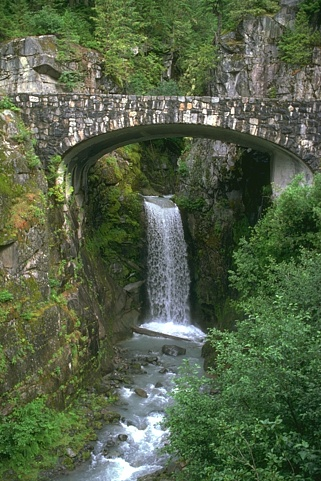

(200,)


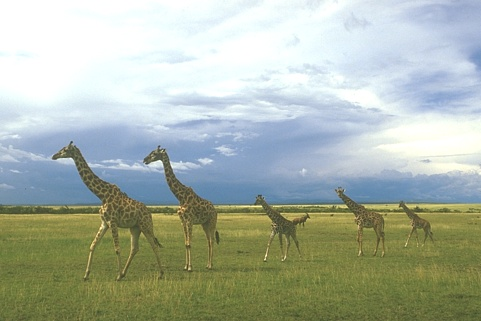

(100,)

In [110]:
base='/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/images/'
test_imgs=[]
train_imgs=[]
val_imgs=[]

#load test data set
test_imgs=load_image(base+'test/',test_imgs)
print(test_imgs.shape)

#load train data set
train_imgs=load_image(base+'train/',train_imgs)
print(train_imgs.shape)

#load val data set
val_imgs=load_image(base+'val/',val_imgs)
val_imgs.shape
 

In [111]:
from scipy import io
import scipy
import os
import imageio
root = '/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/'

def load_ground(root,groundtest_arr,groundtrain_arr,groundval_arr):
  PATH = os.path.join(root,'data//groundTruth')
  for sub_dir_name in ['train','test','val']:
      temp_arr=[]
      sub_pth = os.path.join(PATH,sub_dir_name)
      ##Create a new folder for the generated pictures to save
      save_pth = os.path.join(root,'data//GT_convert',sub_dir_name)
      os.makedirs(save_pth,exist_ok=True)
      print('Start conversion'+sub_dir_name+'Content in folder')

      for filename in os.listdir(sub_pth):
          # Read all data in the mat file
          #mat file contains data stored in dictionary form
          #Include dict_keys(['__globals__','groundTruth','__header__','__version__'])
          #If you want to use the contour in'groundTruth']
          #x['groundTruth'][0][0][0][0][1] is the outline
          #x['groundTruth'][0][0][0][0][0] is the segmentation map
          data = io.loadmat(os.path.join(sub_pth,filename))
          edge_data = data['groundTruth'][0][0][0][0][1]
          #Store the normalized data: 0<x<1
          #So need to restore back to 0<x<255
          edge_data_255 = edge_data * 255
          temp_arr.append(edge_data_255)
          new_img_name = filename.split('.')[0]+'.jpg'
          print(new_img_name)
          #imageio.imwrite(os.path.join(save_pth,new_img_name), edge_data_255)  # save Picture
      if (sub_dir_name=='train' ):
        groundtrain_arr= temp_arr.copy()
        print("#################\nstored in train \n############",np.array(groundtrain_arr).shape)
      elif (sub_dir_name=='test' ):
        groundtest_arr= temp_arr.copy()
        print("#################\nstored in test \n############",np.array(groundtest_arr).shape)
      else:
        groundval_arr= temp_arr.copy()
        print("#################\nstored in val  \n############",np.array(groundval_arr).shape)

  return (groundtest_arr,groundtrain_arr,groundval_arr)
groundtest_arr=[]
groundtrain_arr=[]
groundval_arr=[]
groundtest_arr,groundtrain_arr,groundval_arr=load_ground(root,groundtest_arr,groundtrain_arr,groundval_arr)


Start conversiontrainContent in folder
92059.jpg
22013.jpg
309004.jpg
159045.jpg
35091.jpg
71046.jpg
124084.jpg
97017.jpg
59078.jpg
144067.jpg
247085.jpg
157036.jpg
140055.jpg
56028.jpg
25098.jpg
159091.jpg
65010.jpg
46076.jpg
118020.jpg
33066.jpg
254033.jpg
24004.jpg
27059.jpg
311081.jpg
317080.jpg
43070.jpg
388016.jpg
2092.jpg
246053.jpg
8049.jpg
187071.jpg
249061.jpg
163062.jpg
159029.jpg
353013.jpg
285036.jpg
113016.jpg
299091.jpg
368078.jpg
66075.jpg
87065.jpg
106025.jpg
238011.jpg
302003.jpg
151087.jpg
198054.jpg
207056.jpg
138032.jpg
145014.jpg
126039.jpg
134052.jpg
271008.jpg
293029.jpg
95006.jpg
311068.jpg
286092.jpg
60079.jpg
323016.jpg
196015.jpg
274007.jpg
78019.jpg
187003.jpg
216053.jpg
254054.jpg
166081.jpg
104022.jpg
189011.jpg
260081.jpg
135037.jpg
173036.jpg
271031.jpg
227040.jpg
292066.jpg
122048.jpg
65019.jpg
35058.jpg
176019.jpg
135069.jpg
112082.jpg
376020.jpg
80099.jpg
225017.jpg
153093.jpg
277095.jpg
169012.jpg
41025.jpg
134008.jpg
209070.jpg
155060.jpg
24063.jpg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


296058.jpg
344010.jpg
117025.jpg
145059.jpg
217013.jpg
2018.jpg
130066.jpg
130014.jpg
189013.jpg
290035.jpg
385022.jpg
181021.jpg
302022.jpg
160006.jpg
201080.jpg
20069.jpg
258089.jpg
107072.jpg
48025.jpg
226033.jpg
268048.jpg
326085.jpg
69022.jpg
384089.jpg
268074.jpg
118072.jpg
141048.jpg
16004.jpg
81090.jpg
80090.jpg
179084.jpg
163004.jpg
147077.jpg
159022.jpg
246009.jpg
164046.jpg
28083.jpg
208078.jpg
71076.jpg
187099.jpg
281017.jpg
277053.jpg
238025.jpg
196062.jpg
108004.jpg
206097.jpg
5096.jpg
296028.jpg
346016.jpg
145079.jpg
118015.jpg
176051.jpg
279005.jpg
188025.jpg
168084.jpg
259060.jpg
134067.jpg
189029.jpg
372019.jpg
65084.jpg
45000.jpg
23050.jpg
120003.jpg
100007.jpg
189006.jpg
35028.jpg
134049.jpg
163096.jpg
106047.jpg
207049.jpg
250047.jpg
107014.jpg
157087.jpg
388006.jpg
156054.jpg
101027.jpg
309040.jpg
230098.jpg
3063.jpg
35049.jpg
161045.jpg
247003.jpg
104010.jpg
15062.jpg
8068.jpg
48017.jpg
109055.jpg
335088.jpg
220003.jpg
69007.jpg
226022.jpg
81066.jpg
226060.jpg
60

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


58060.jpg
175043.jpg
102061.jpg
16077.jpg
148089.jpg
219090.jpg
89072.jpg
69015.jpg
304034.jpg
8023.jpg
134035.jpg
87046.jpg
223061.jpg
43074.jpg
361010.jpg
42012.jpg
21077.jpg
167083.jpg
12084.jpg
108082.jpg
157055.jpg
76053.jpg
253027.jpg
385039.jpg
66053.jpg
302008.jpg
163085.jpg
14037.jpg
19021.jpg
85048.jpg
260058.jpg
108070.jpg
101085.jpg
189080.jpg
78004.jpg
86068.jpg
38082.jpg
24077.jpg
126007.jpg
41069.jpg
148026.jpg
182053.jpg
167062.jpg
306005.jpg
109053.jpg
376043.jpg
45096.jpg
54082.jpg
285079.jpg
241048.jpg
296059.jpg
210088.jpg
130026.jpg
196073.jpg
351093.jpg
123074.jpg
295087.jpg
299086.jpg
65033.jpg
304074.jpg
241004.jpg
55073.jpg
106024.jpg
271035.jpg
38092.jpg
220075.jpg
103070.jpg
296007.jpg
160068.jpg
33039.jpg
253055.jpg
62096.jpg
229036.jpg
119082.jpg
42049.jpg
175032.jpg
300091.jpg
105025.jpg
86000.jpg
86016.jpg
37073.jpg
145086.jpg
216081.jpg
208001.jpg
156065.jpg
143090.jpg
197017.jpg
291000.jpg
170057.jpg
41033.jpg
3096.jpg
69040.jpg
147091.jpg
159008.jpg
23

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


(100,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


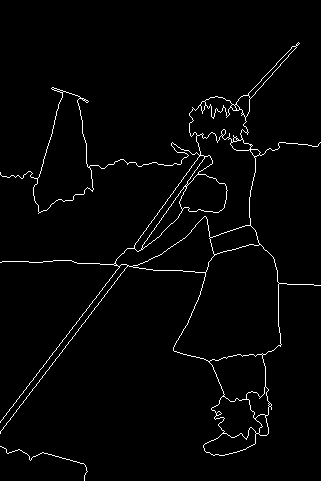

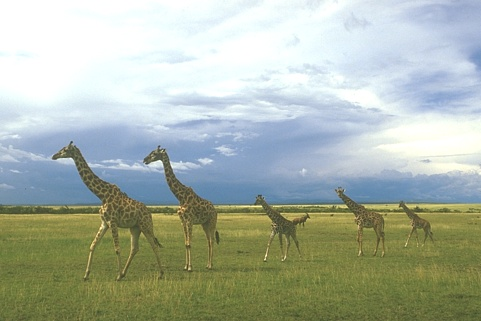

In [115]:
print(np.array(groundval_arr).shape)
display_img(np.array(groundval_arr))
display_img(val_imgs)

In [113]:
# A Python program to return multiple
# values from a method using tuple

# This function returns a tuple
def fun():
	str = "geeksforgeeks"
	x = 20
	return str, x; # Return tuple, we could also
					# write (str, x)

# Driver code to test above method
str, x = fun() # Assign returned tuple
print(str)
print(x)


geeksforgeeks
20


In [114]:

import numpy as np
#import matplotlib.pyplot as plt
from scipy import io
import scipy
import os
 
 
PATH = os.path.join(os.path.dirname('/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data//groundTruth//')
#"""处理train"""
train_list =os.listdir(PATH+'train/')
print(len(train_list))
for index in train_list:
    name=index.split('.')[0]
    print(name)
    train=io.loadmat(PATH+'//train//'+index)
    #print(train)
    a=np.array(1024)
    a=train['groundTruth'][0][0][0][0][1]
    print(a)
    a=a*255
    print(PATH+'trans//train//'+str(name))
    scipy.misc.imsave(PATH+'trans//train//'+str(name)+'.jpg', a)#保存图片
    
 
#"""处理test"""
test_list =os.listdir(PATH+'test')
print(len(test_list))
for index in test_list:
    name=index.split('.')[0]
    print(name)
    test=io.loadmat(PATH+'//test//'+index)
    #print(train)
    a=np.array(1024)
    a=test['groundTruth'][0][0][0][0][1]
    print(a)
    a=a*255
    print(PATH+'trans//test//'+str(name))
    scipy.misc.imsave(PATH+'trans//test//'+str(name)+'.jpg', a)#保存图片
 
#"""处理val"""
val_list =os.listdir(PATH+'val')
print(len(val_list))
for index in val_list:
    name=index.split('.')[0]
    print(name)
    val=io.loadmat(PATH+'//val//'+index)
    #print(train)
    a=np.array(1024)
    a=val['groundTruth'][0][0][0][0][1]
    print(a)
    a=a*255
    print(PATH+'trans//val//'+str(name))
    scipy.misc.imsave(PATH+'trans//val//'+str(name)+'.jpg', a)#保存图片
————————————————


SyntaxError: ignored